Build co-author network for authors in 2010-2012

In [1]:
import seaborn as sns
import networkx as nx
import operator
from tqdm import tqdm_notebook as tqdm

In [2]:
df= pd.read_csv("../data/wsdata1017withim.csv")

In [3]:
df.head()

,Unnamed: 0,AF,TI,SO,DT,DE,ID,AB,FU,CR,PY,UT,IM
0,1000,"Dashnyam, Khandmaa; Jin, Guang-Zhen; Kim, Joon...",Promoting angiogenesis with mesoporous microca...,BIOMATERIALS,Article,Angiogenesis; Co-delivery; Silicon ion; VEGF; ...,ENDOTHELIAL GROWTH-FACTOR; CHICK CHORIOALLANTO...,Angiogenic capacity of biomaterials is a key a...,National Research Foundation (Global Research ...,"Ananthakrishnan R, 2007, INT J BIOL SCI, V3, P...",2017.0,WOS:000392681100013,8.806
1,1001,"Zhang, Peipei; Andorko, James I.; Jewell, Chri...","Impact of dose, route, and composition on the ...",BIOTECHNOLOGY AND BIOENGINEERING,Article,vaccine; adjuvant; polyelectrolyte multilayer;...,DENDRITIC CELLS; TLR AGONISTS; ADJUVANTS; RESP...,Biomaterial vaccines offer new capabilities th...,NSF CAREER Award [1351688]; Alliance for Cance...,"Andorko JI, 2015, AAPS J, V17, P323, DOI 10.12...",2017.0,WOS:000392539800017,3.952
2,1002,"Fujioka-Kobayashi, Masako; Schaller, Benoit; S...",Growth factor delivery of BMP9 using a novel n...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,BMP; BMP2; BMP9; natural bone mineral; bone gr...,MORPHOGENETIC PROTEIN-2; DIFFERENTIATION; PROL...,"Within the past years, BMP9 has been character...",NaN,"Anderson DG, 2004, SCIENCE, V305, P1923, DOI 1...",2017.0,WOS:000392506300006,3.231
3,1003,"Ferraz, Emanuela P.; Oliveira, Fabiola S.; de ...",Bioactive glass-based surfaces induce differen...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,bioactive glass; biosilicate; bone; mRNA seque...,IN-VITRO; CERAMIC BIOSILICATE(R); IONIC PRODUC...,The ability of Biosilicate (R) with two crysta...,"Sao Paulo Research Foundation, FAPESP, Brazil ...","Azenha Marcelo Rodrigues, 2010, Braz. Dent. J....",2017.0,WOS:000392506300007,3.231
4,1004,"Barros, Joana; Grenho, Liliana; Fontenente, Si...",Staphylococcus aureus and Escherichia coli dua...,JOURNAL OF BIOMEDICAL MATERIALS RESEARCH PART A,Article,nanohydroxyapatite; chlorhexidine digluconate;...,BACTERIAL BIOFILMS; MULTISPECIES BIOFILMS; ORT...,Implant-associated infections are caused by su...,Programa Operacional Factores de Competitivida...,"Applerot G, 2009, ADV FUNCT MATER, V19, P842, ...",2017.0,WOS:000392506300014,3.231


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26231 entries, 0 to 26230
Data columns (total 13 columns):
Unnamed: 0    26231 non-null int64
AF            26231 non-null object
TI            26231 non-null object
SO            26231 non-null object
DT            26231 non-null object
DE            19471 non-null object
ID            24755 non-null object
AB            25214 non-null object
FU            19349 non-null object
CR            25590 non-null object
PY            26231 non-null float64
UT            26231 non-null object
IM            26231 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.6+ MB


## Distribution based on Year

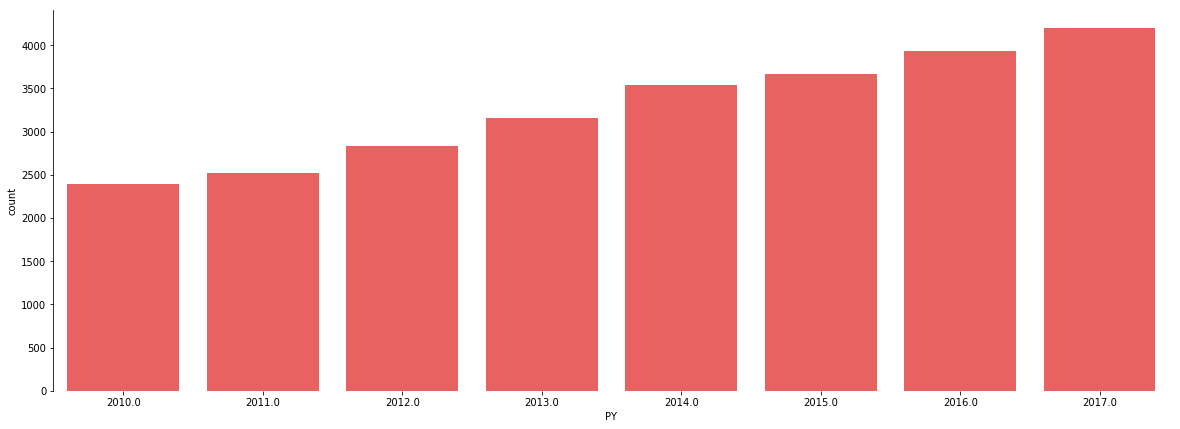

In [5]:
fig, ax = plt.subplots(figsize=(20,7))
ax=sns.countplot(x = "PY", data = df,\
             color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)

plt.show();

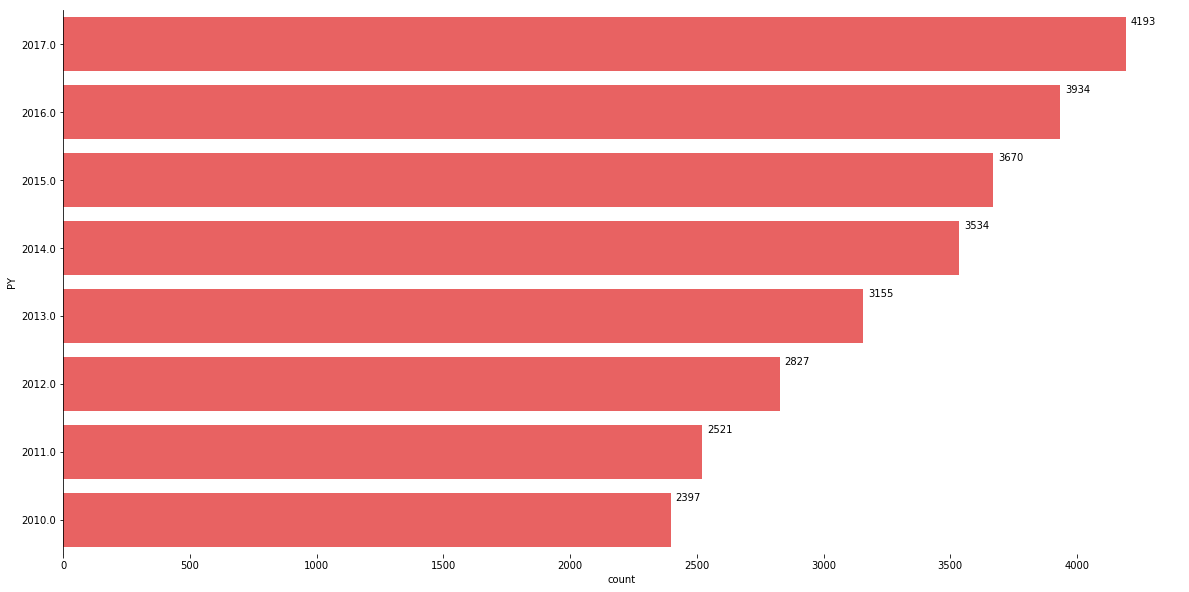

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.countplot(y = "PY", data = df,\
             order = df['PY'].value_counts().index,color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width()+20, p.get_y()),va="top")

plt.show();

In [7]:
df['fund_label'] = df['FU'].fillna(0).apply(lambda x: 1 if x!=0 else 0)

## Extract data in 10-12

In [8]:
df1 = df[(df['PY']>=2010)&(df['PY']<=2012)]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 1500 to 25731
Data columns (total 14 columns):
Unnamed: 0    7745 non-null int64
AF            7745 non-null object
TI            7745 non-null object
SO            7745 non-null object
DT            7745 non-null object
DE            5663 non-null object
ID            7190 non-null object
AB            7389 non-null object
FU            5301 non-null object
CR            7515 non-null object
PY            7745 non-null float64
UT            7745 non-null object
IM            7745 non-null float64
fund_label    7745 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 907.6+ KB


## Extract authors

In [11]:
df1_author=df1.AF.str.split(';', expand=True).add_prefix('au')

In [12]:
df1_author.head()

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au20,au21,au22,au23,au24,au25,au26,au27,au28,au29
1500,"Costa, Eunice","de-Carvalho, Jorge","Casimiro, Teresa","da Silva, Claudia Lobato","Cidade, Maria Teresa","Aguiar-Ricardo, Ana",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1501,"Carson, William C.","Gerling, Gregory J.","Krupski, Tracey L.","Kowalik, Casey G.","Harper, Jeffrey C.","Moskaluk, Christopher A.",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1502,"Cesar Cuggino, Julio","Cristina Strumia, Miriam","Alvarez Igarzabal, Cecilia Ines",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1503,"Costa, Fabiola","Carvalho, Isabel F.","Montelaro, Ronald C.","Gomes, P.","Martins, M. Cristina L.",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1504,"Seidi, Azadeh","Ramalingam, Murugan","Elloumi-Hannachi, Imen","Ostrovidov, Serge","Khademhosseini, Ali",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
df1_author = df1_author.applymap(lambda x: x.lstrip() if type(x) is str else x)

In [16]:
df1_author.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 1500 to 25731
Data columns (total 30 columns):
au0     7745 non-null object
au1     7379 non-null object
au2     6475 non-null object
au3     5288 non-null object
au4     4006 non-null object
au5     2744 non-null object
au6     1778 non-null object
au7     1102 non-null object
au8     652 non-null object
au9     369 non-null object
au10    214 non-null object
au11    122 non-null object
au12    69 non-null object
au13    50 non-null object
au14    31 non-null object
au15    23 non-null object
au16    13 non-null object
au17    9 non-null object
au18    6 non-null object
au19    5 non-null object
au20    5 non-null object
au21    5 non-null object
au22    4 non-null object
au23    3 non-null object
au24    2 non-null object
au25    2 non-null object
au26    2 non-null object
au27    2 non-null object
au28    2 non-null object
au29    1 non-null object
dtypes: object(30)
memory usage: 1.8+ MB


In [17]:
df1_author.fillna(value=np.nan, inplace=True)

In [18]:
df1_author[df1_author['au29'].notnull()]

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au20,au21,au22,au23,au24,au25,au26,au27,au28,au29
14139,"Eckardt, Kai-Uwe","Baerthlein, Barbara","Baid-Agrawal, Seema","Beck, Andreas","Busch, Martin","Eitner, Frank","Ekici, Arif B.","Floege, Juergen","Gefeller, Olaf","Haller, Hermann",...,"Schaeffner, Elke","Schultheiss, Ulla T.","Seuchter, Susanne A.","Sitter, Thomas","Sommerer, Claudia","Walz, Gerd","Wanner, Christoph","Wolf, Gunter","Zeier, Martin","Titze, Stephanie"


## Distribution of the number of authors

In [19]:
number_of_author=df1_author.count(axis=1).reset_index()
number_of_author.columns=["index", "author_count"]
number_of_author.head()

,index,author_count
0,1500,6
1,1501,6
2,1502,3
3,1503,5
4,1504,5


In [20]:
number_of_author.author_count.sum()

38108

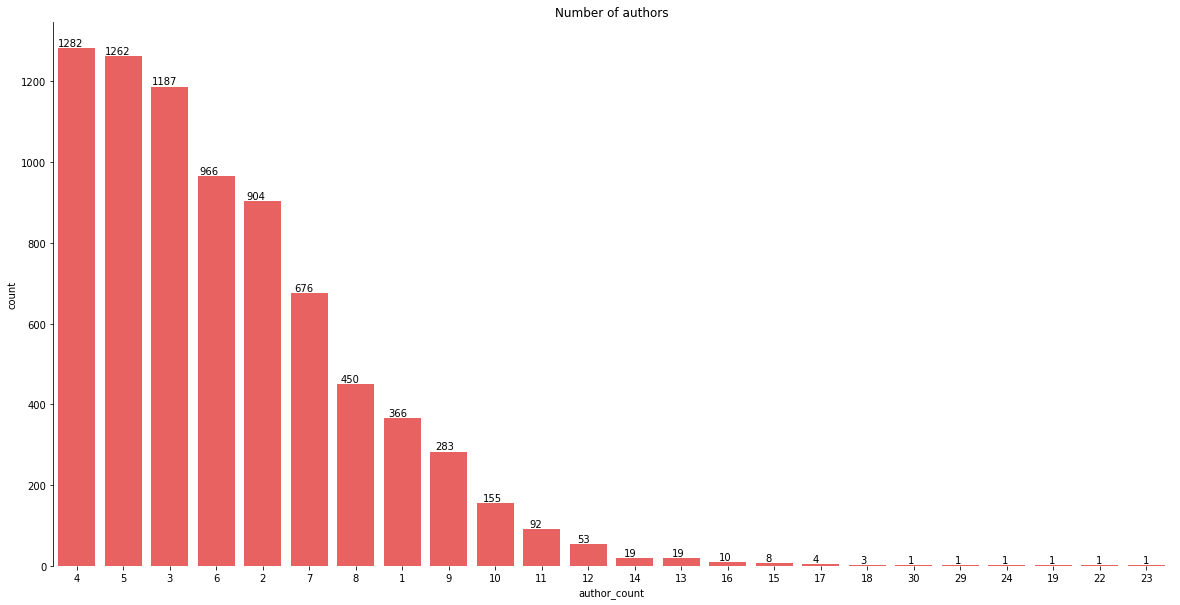

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.countplot(x = "author_count", data = number_of_author,\
             order = number_of_author['author_count'].value_counts().index,color='r',alpha=0.7)
sns.despine()
ax.spines['bottom'].set_visible(False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() +5))
plt.title("Number of authors")
plt.show();

In [22]:
df1_author.head()

,au0,au1,au2,au3,au4,au5,au6,au7,au8,au9,...,au20,au21,au22,au23,au24,au25,au26,au27,au28,au29
2862,"Costa, Eunice","de-Carvalho, Jorge","Casimiro, Teresa","da Silva, Claudia Lobato","Cidade, Maria Teresa","Aguiar-Ricardo, Ana",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2863,"Carson, William C.","Gerling, Gregory J.","Krupski, Tracey L.","Kowalik, Casey G.","Harper, Jeffrey C.","Moskaluk, Christopher A.",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2864,"Cesar Cuggino, Julio","Cristina Strumia, Miriam","Alvarez Igarzabal, Cecilia Ines",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2865,"Costa, Fabiola","Carvalho, Isabel F.","Montelaro, Ronald C.","Gomes, P.","Martins, M. Cristina L.",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2866,"Seidi, Azadeh","Ramalingam, Murugan","Elloumi-Hannachi, Imen","Ostrovidov, Serge","Khademhosseini, Ali",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Save authors to txt**

In [22]:
df1_author.to_csv(r'../data/1012.txt', header=None, index=None, sep=';',mode='a')

**Load network from txt**

In [23]:
G = nx.read_adjlist('../data/1012.txt',delimiter=';',create_using=nx.DiGraph)

In [24]:
G.nodes()

NodeView(('Costa, Eunice', 'de-Carvalho, Jorge', 'Casimiro, Teresa', 'da Silva, Claudia Lobato', 'Cidade, Maria Teresa', 'Aguiar-Ricardo, Ana', '', 'Carson, William C.', 'Gerling, Gregory J.', 'Krupski, Tracey L.', 'Kowalik, Casey G.', 'Harper, Jeffrey C.', 'Moskaluk, Christopher A.', 'Cesar Cuggino, Julio', 'Cristina Strumia, Miriam', 'Alvarez Igarzabal, Cecilia Ines', 'Costa, Fabiola', 'Carvalho, Isabel F.', 'Montelaro, Ronald C.', 'Gomes, P.', 'Martins, M. Cristina L.', 'Seidi, Azadeh', 'Ramalingam, Murugan', 'Elloumi-Hannachi, Imen', 'Ostrovidov, Serge', 'Khademhosseini, Ali', 'Xin, Y.', 'Hu, T.', 'Chu, P. K.', 'Nakayama, Yasuhide', 'Okuda, Kanna', 'Takamizawa, Keiichi', 'Nakayama, Atsuyoshi', 'Deng, Mingxiao', 'Wu, Jun', 'Reinhart-King, Cynthia A.', 'Chu, Chih-Chang', 'Lavenus, Sandrine', 'Pilet, Paul', 'Guicheux, Jerome', 'Weiss, Pierre', 'Louarn, Guy', 'Layrolle, Pierre', 'Yu, Qian', 'Zhang, Yanxia', 'Wang, Hongwei', 'Brash, John', 'Chen, Hong', 'Jaafar, Israd H.', 'LeBlon, Cour

In [25]:
G.number_of_nodes(),G.number_of_edges()

(28217, 35134)

**Check the nodes and clean it**

In [26]:
list(G.nodes())

['Costa, Eunice',
 'de-Carvalho, Jorge',
 'Casimiro, Teresa',
 'da Silva, Claudia Lobato',
 'Cidade, Maria Teresa',
 'Aguiar-Ricardo, Ana',
 '',
 'Carson, William C.',
 'Gerling, Gregory J.',
 'Krupski, Tracey L.',
 'Kowalik, Casey G.',
 'Harper, Jeffrey C.',
 'Moskaluk, Christopher A.',
 'Cesar Cuggino, Julio',
 'Cristina Strumia, Miriam',
 'Alvarez Igarzabal, Cecilia Ines',
 'Costa, Fabiola',
 'Carvalho, Isabel F.',
 'Montelaro, Ronald C.',
 'Gomes, P.',
 'Martins, M. Cristina L.',
 'Seidi, Azadeh',
 'Ramalingam, Murugan',
 'Elloumi-Hannachi, Imen',
 'Ostrovidov, Serge',
 'Khademhosseini, Ali',
 'Xin, Y.',
 'Hu, T.',
 'Chu, P. K.',
 'Nakayama, Yasuhide',
 'Okuda, Kanna',
 'Takamizawa, Keiichi',
 'Nakayama, Atsuyoshi',
 'Deng, Mingxiao',
 'Wu, Jun',
 'Reinhart-King, Cynthia A.',
 'Chu, Chih-Chang',
 'Lavenus, Sandrine',
 'Pilet, Paul',
 'Guicheux, Jerome',
 'Weiss, Pierre',
 'Louarn, Guy',
 'Layrolle, Pierre',
 'Yu, Qian',
 'Zhang, Yanxia',
 'Wang, Hongwei',
 'Brash, John',
 'Chen, Ho

In [27]:
G.remove_node('')

In [28]:
G.number_of_nodes(),G.number_of_edges()

(28216, 28477)

# Check the network infomation

In [29]:
# edges of network
list(G.edges())

[('Costa, Eunice', 'de-Carvalho, Jorge'),
 ('Costa, Eunice', 'Casimiro, Teresa'),
 ('Costa, Eunice', 'da Silva, Claudia Lobato'),
 ('Costa, Eunice', 'Cidade, Maria Teresa'),
 ('Costa, Eunice', 'Aguiar-Ricardo, Ana'),
 ('Carson, William C.', 'Gerling, Gregory J.'),
 ('Carson, William C.', 'Krupski, Tracey L.'),
 ('Carson, William C.', 'Kowalik, Casey G.'),
 ('Carson, William C.', 'Harper, Jeffrey C.'),
 ('Carson, William C.', 'Moskaluk, Christopher A.'),
 ('Cesar Cuggino, Julio', 'Cristina Strumia, Miriam'),
 ('Cesar Cuggino, Julio', 'Alvarez Igarzabal, Cecilia Ines'),
 ('Costa, Fabiola', 'Carvalho, Isabel F.'),
 ('Costa, Fabiola', 'Montelaro, Ronald C.'),
 ('Costa, Fabiola', 'Gomes, P.'),
 ('Costa, Fabiola', 'Martins, M. Cristina L.'),
 ('Martins, M. Cristina L.', 'Ochoa-Mendes, Vanessa'),
 ('Martins, M. Cristina L.', 'Ferreira, Gisela'),
 ('Martins, M. Cristina L.', 'Barbosa, Judite N.'),
 ('Martins, M. Cristina L.', 'Curtin, Scott A.'),
 ('Martins, M. Cristina L.', 'Ratner, Buddy D.'

In [30]:
#edges for specific nodes 
G.edges('Costa, Fabiola') 

OutEdgeDataView([('Costa, Fabiola', 'Carvalho, Isabel F.'), ('Costa, Fabiola', 'Montelaro, Ronald C.'), ('Costa, Fabiola', 'Gomes, P.'), ('Costa, Fabiola', 'Martins, M. Cristina L.')])

In [31]:
G.in_degree()

InDegreeView({'Costa, Eunice': 0, 'de-Carvalho, Jorge': 1, 'Casimiro, Teresa': 2, 'da Silva, Claudia Lobato': 1, 'Cidade, Maria Teresa': 1, 'Aguiar-Ricardo, Ana': 2, 'Carson, William C.': 0, 'Gerling, Gregory J.': 1, 'Krupski, Tracey L.': 1, 'Kowalik, Casey G.': 1, 'Harper, Jeffrey C.': 1, 'Moskaluk, Christopher A.': 1, 'Cesar Cuggino, Julio': 0, 'Cristina Strumia, Miriam': 1, 'Alvarez Igarzabal, Cecilia Ines': 1, 'Costa, Fabiola': 0, 'Carvalho, Isabel F.': 1, 'Montelaro, Ronald C.': 1, 'Gomes, P.': 1, 'Martins, M. Cristina L.': 4, 'Seidi, Azadeh': 0, 'Ramalingam, Murugan': 2, 'Elloumi-Hannachi, Imen': 1, 'Ostrovidov, Serge': 1, 'Khademhosseini, Ali': 20, 'Xin, Y.': 0, 'Hu, T.': 1, 'Chu, P. K.': 2, 'Nakayama, Yasuhide': 0, 'Okuda, Kanna': 1, 'Takamizawa, Keiichi': 1, 'Nakayama, Atsuyoshi': 1, 'Deng, Mingxiao': 1, 'Wu, Jun': 5, 'Reinhart-King, Cynthia A.': 2, 'Chu, Chih-Chang': 2, 'Lavenus, Sandrine': 0, 'Pilet, Paul': 2, 'Guicheux, Jerome': 3, 'Weiss, Pierre': 3, 'Louarn, Guy': 1, 'Lay

In [32]:
G.degree()

DiDegreeView({'Costa, Eunice': 5, 'de-Carvalho, Jorge': 1, 'Casimiro, Teresa': 2, 'da Silva, Claudia Lobato': 1, 'Cidade, Maria Teresa': 1, 'Aguiar-Ricardo, Ana': 2, 'Carson, William C.': 5, 'Gerling, Gregory J.': 1, 'Krupski, Tracey L.': 1, 'Kowalik, Casey G.': 1, 'Harper, Jeffrey C.': 1, 'Moskaluk, Christopher A.': 1, 'Cesar Cuggino, Julio': 2, 'Cristina Strumia, Miriam': 1, 'Alvarez Igarzabal, Cecilia Ines': 1, 'Costa, Fabiola': 4, 'Carvalho, Isabel F.': 1, 'Montelaro, Ronald C.': 1, 'Gomes, P.': 1, 'Martins, M. Cristina L.': 10, 'Seidi, Azadeh': 4, 'Ramalingam, Murugan': 2, 'Elloumi-Hannachi, Imen': 1, 'Ostrovidov, Serge': 1, 'Khademhosseini, Ali': 20, 'Xin, Y.': 2, 'Hu, T.': 1, 'Chu, P. K.': 2, 'Nakayama, Yasuhide': 13, 'Okuda, Kanna': 1, 'Takamizawa, Keiichi': 1, 'Nakayama, Atsuyoshi': 1, 'Deng, Mingxiao': 4, 'Wu, Jun': 11, 'Reinhart-King, Cynthia A.': 2, 'Chu, Chih-Chang': 2, 'Lavenus, Sandrine': 5, 'Pilet, Paul': 2, 'Guicheux, Jerome': 3, 'Weiss, Pierre': 3, 'Louarn, Guy': 1, '

In [33]:
G.in_degree('Costa, Fabiola'),G.out_degree('Costa, Fabiola'),G.degree('Costa, Fabiola')

(0, 4, 4)

In [34]:
df_edges = pd.DataFrame(list(G.edges), columns=['author1', 'author2'])

In [35]:
df_edges.to_csv('../data/1012networkedges.csv')

In [36]:
df_nodes = pd.DataFrame(list(G.nodes), columns=['author'])

# Calculate the centraility

In [37]:
closeCent = nx.closeness_centrality(G)
closesort=sorted(closeCent.items(),key=operator.itemgetter(1),reverse=True)
df_close = pd.DataFrame(closesort)
df_close1=df_close.head(10)
#topbtw=df1['business_id'].values.tolist()
#topbtw
#df1

In [38]:
df_close.head(10)

,0,1
0,"Kaplan, David L.",0.002057
1,"Mano, Joao F.",0.001113
2,"Lendlein, Andreas",0.000946
3,"Langer, Robert",0.000839
4,"Khademhosseini, Ali",0.000830
5,"Reis, Rui L.",0.000792
6,"Ambrosio, Luigi",0.000740
7,"Behl, Marc",0.000669
8,"Hofmann, Dieter",0.000638
9,"Vienken, Joerg",0.000618


In [39]:
degree = nx.degree_centrality(G)
between = nx.betweenness_centrality(G)
close = nx.closeness_centrality(G)
eigen = nx.eigenvector_centrality(G)

## print the multiple centrality metrics to a single line for each node:
#for n in G:
#    print ("%d, %f, %f, %f, %f"%(n, degree[n], between[n], close[n], eigen[n]))

In [40]:
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)

In [41]:
lst=[]
for n in G:
    lst.append([n,degree[n], indegree[n], outdegree[n], between[n], close[n], eigen[n]])
df_nodes = pd.DataFrame(lst)
df_nodes.columns=['author','degree', 'indegree', 'outdegree','between','close','eigen']

In [42]:
df_nodes

,author,degree,indegree,outdegree,between,close,eigen
0,"Costa, Eunice",0.000177,0.000000,0.000177,0.000000e+00,0.000000,2.245117e-15
1,"de-Carvalho, Jorge",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14
2,"Casimiro, Teresa",0.000071,0.000071,0.000000,0.000000e+00,0.000071,8.755958e-14
3,"da Silva, Claudia Lobato",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14
4,"Cidade, Maria Teresa",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14
5,"Aguiar-Ricardo, Ana",0.000071,0.000071,0.000000,0.000000e+00,0.000071,8.755958e-14
6,"Carson, William C.",0.000177,0.000000,0.000177,0.000000e+00,0.000000,2.245117e-15
7,"Gerling, Gregory J.",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14
8,"Krupski, Tracey L.",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14
9,"Kowalik, Casey G.",0.000035,0.000035,0.000000,0.000000e+00,0.000035,4.490235e-14


In [43]:
df_nodes.to_csv('../data/1012nodes.csv',index=False)

In [53]:
G.number_of_edges()

28477

<BarContainer object of 34 artists>

Text(0.5, 1.0, 'Degree Histogram')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Degree')

[Text(0, 0, '63'),
 Text(0, 0, '38'),
 Text(0, 0, '32'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

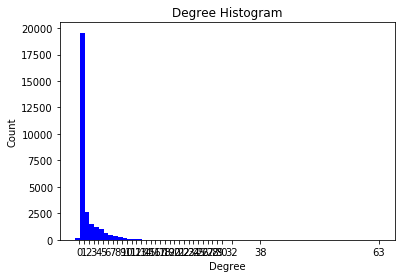

In [62]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=1, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

In [83]:
remove1 = [node for node,degree in dict(G.degree()).items() if degree < 15]

In [81]:
remove2 = [node for node,degree in dict(G.degree()).items() if degree >30]

In [84]:
G.remove_nodes_from(remove1)

G.number_of_nodes()

78

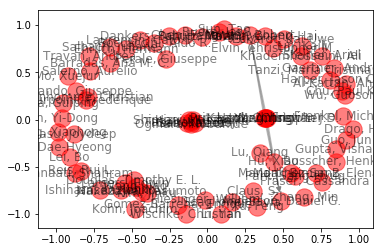

In [90]:
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,node_size=300, edge_color="gray",alpha=0.5)